In [169]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential

In [0]:
from keras.layers import Dense,Dropout,Flatten

In [0]:
from keras.optimizers import Adam

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
from keras.layers.convolutional import Conv2D,MaxPooling2D 

In [0]:
np.random.seed(0)

In [176]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import pandas as pd

In [0]:
import random

In [0]:
dataset = pd.read_csv('german-traffic-signs/signnames.csv')

In [180]:
dataset.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [0]:
import pickle as pkl
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pkl.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data=pkl.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pkl.load(f)

In [0]:
X_train,y_train = train_data['features'],train_data['labels']

In [0]:
X_test,y_test = test_data['features'],test_data['labels']

In [0]:
X_val,y_val = val_data['features'],val_data['labels']

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

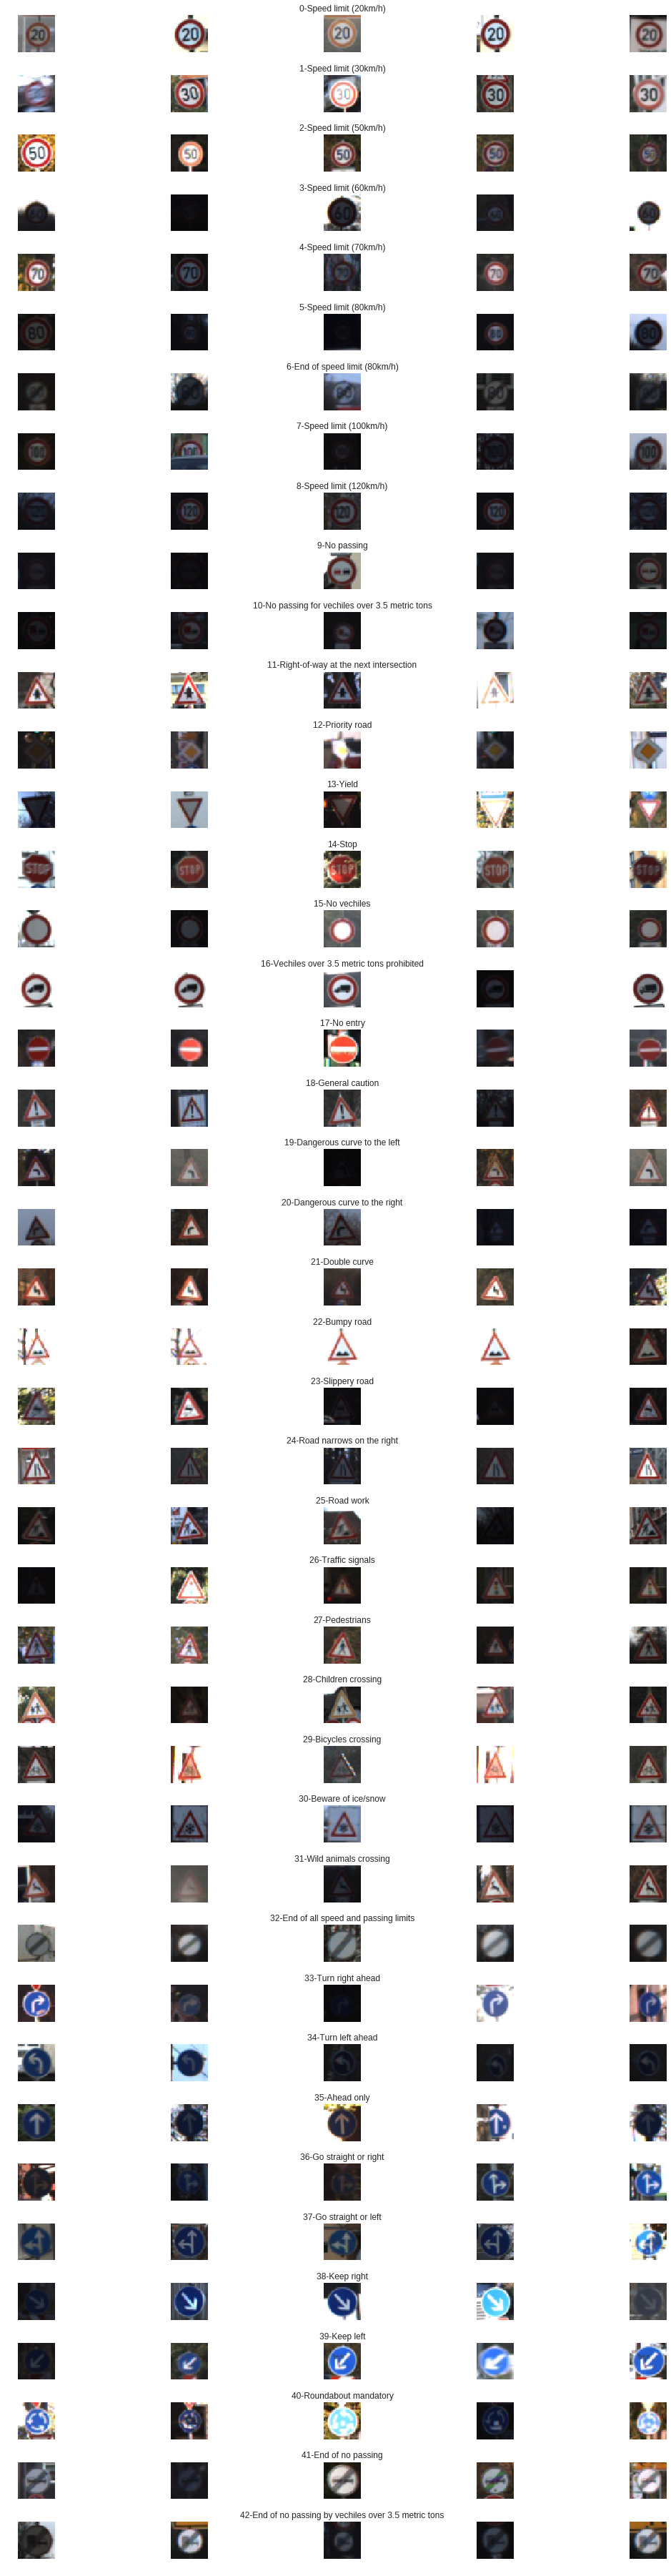

In [186]:
num_of_sample=[]

cols=5
num_classes=43
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(15,50))
fig.tight_layout()

for i in range(cols):
  for j,raw in dataset.iterrows():
    x_selected=X_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    
    if i==2:
      axs[j][i].set_title(str(j)+'-'+raw['SignName'])
      num_of_sample.append(len(x_selected))

In [0]:
import cv2

In [0]:
def grayScale(img):
  return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [0]:
def equalize(img):
  return cv2.equalizeHist(img)

In [0]:
def preprocess(img):
  img = grayScale(img)
  img = equalize(img)
  return img/255

Text(0.5, 1.0, 'Image At 1 From X_train Data')

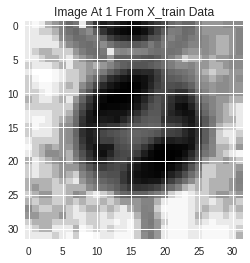

In [191]:
plt.imshow(preprocess(X_train[1]))
plt.title("Image At 1 From X_train Data")

In [0]:
X_train=np.array(list(map(preprocess,X_train)))
X_test=np.array(list(map(preprocess,X_test)))
X_val=np.array(list(map(preprocess,X_val)))

In [193]:
X_train[1]

array([[0.15686275, 0.05098039, 0.15686275, ..., 0.53333333, 0.53333333,
        0.53333333],
       [0.15686275, 0.15686275, 0.29019608, ..., 0.49411765, 0.49411765,
        0.56078431],
       [0.15686275, 0.15686275, 0.15686275, ..., 0.40784314, 0.49411765,
        0.56078431],
       ...,
       [0.29019608, 0.40784314, 0.40784314, ..., 0.15686275, 0.15686275,
        0.15686275],
       [0.15686275, 0.29019608, 0.40784314, ..., 0.05098039, 0.15686275,
        0.29019608],
       [0.15686275, 0.15686275, 0.15686275, ..., 0.05098039, 0.15686275,
        0.40784314]])

In [0]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [0]:
X_train=X_train.reshape(34799,32,32,1)
X_test=X_test.reshape(12630,32,32,1)
X_val=X_val.reshape(4410,32,32,1)


In [0]:
def lenet():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(32,32,1),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dropout(0.2))
  model.add(Dense(43,activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [0]:
model = lenet()

In [198]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
__________

In [199]:
history=model.fit(X_train,y_train,epochs=10,batch_size=400,verbose=1,shuffle=1,validation_data=(x_val,y_val))

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 2s 59us/step - loss: 2.4479 - acc: 0.3576 - val_loss: 1.1668 - val_acc: 0.6721
Epoch 2/10
34799/34799 [==============================] - 1s 42us/step - loss: 0.7816 - acc: 0.7630 - val_loss: 0.5769 - val_acc: 0.8215
Epoch 3/10
34799/34799 [==============================] - 1s 41us/step - loss: 0.4348 - acc: 0.8702 - val_loss: 0.4131 - val_acc: 0.8705
Epoch 4/10
34799/34799 [==============================] - 1s 41us/step - loss: 0.2947 - acc: 0.9151 - val_loss: 0.3532 - val_acc: 0.8896
Epoch 5/10
34799/34799 [==============================] - 1s 41us/step - loss: 0.2243 - acc: 0.9361 - val_loss: 0.3111 - val_acc: 0.9063
Epoch 6/10
34799/34799 [==============================] - 1s 41us/step - loss: 0.1756 - acc: 0.9497 - val_loss: 0.3145 - val_acc: 0.9073
Epoch 7/10
34799/34799 [==============================] - 1s 41us/step - loss: 0.1398 - acc: 0.9604 - val_loss: 0.2961 - val_acc:

Text(0.5, 0, 'epoch')

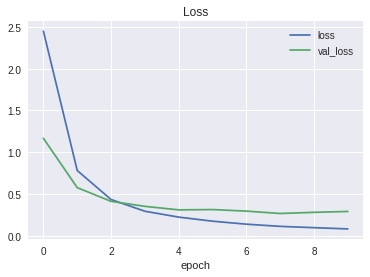

In [200]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

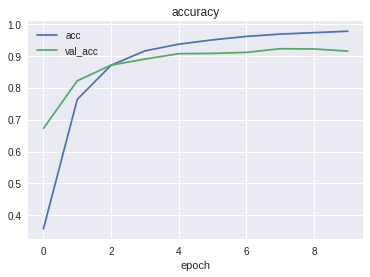

In [201]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('accuracy')
plt.xlabel('epoch')

In [0]:
import requests
from PIL import Image

In [0]:
url="https://i.ebayimg.com/images/g/8u4AAMXQlgtS9Ko7/s-l300.jpg"
response=requests.get(url,stream=True)
img=Image.open(response.raw)

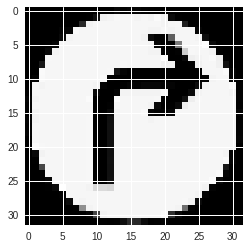

In [204]:
import cv2
img_array=np.asarray(img)
res=cv2.resize(img_array,(32,32))
gray=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
image=cv2.bitwise_not(gray)
plt.imshow(image,cmap=plt.get_cmap('gray'))

In [205]:
image=image.reshape(1,32,32,1)
str(model.predict_classes(image))

'[36]'

In [0]:
,